<a href="https://colab.research.google.com/github/BrianChegeGichau/Adanalysis/blob/master/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train.csv")
train.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0


In [ ]:
test = pd.read_csv("test.csv")
test.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [ ]:
oil = pd.read_csv("oil.csv")
oil.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [ ]:
stores = pd.read_csv("stores.csv")
stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [ ]:
transactions = pd.read_csv("transactions.csv")
transactions.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [ ]:
holidays_events = pd.read_csv("holidays_events.csv")
holidays_events.head(2)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


## Data Understanding & Preparation

In [ ]:
d_f = [train,test]
df = pd.concat(d_f)
df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0


In [ ]:
train.shape

(796537, 6)

In [ ]:
test.shape

(28512, 5)

In [ ]:
df.shape

(825049, 6)

In [ ]:
stores.shape

(54, 5)

In [ ]:
df.tail(2)

,id,date,store_nbr,family,sales,onpromotion
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9.0
28511,3029399,2017-08-31,9,SEAFOOD,NaN,0.0


In [ ]:
stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [ ]:
def map(column)

In [ ]:
stores['store_nbr'].nunique()

54

In [ ]:
df1 = pd.merge(df, stores, validate = 'one_to_many')
print(df1)

MergeError: ignored

In [ ]:
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales          28513
onpromotion        1
dtype: int64

In [ ]:
 #Checking for duplicated rows in our dataset
df.duplicated().any()
#There are no dupliacted rows in our dataset

False

In [ ]:
df['store_nbr'].nunique()

54

In [ ]:
df['family'].nunique()

34

In [ ]:
from datetime import datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0.0,2013,1,1


## Data Analysis

In [ ]:
df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


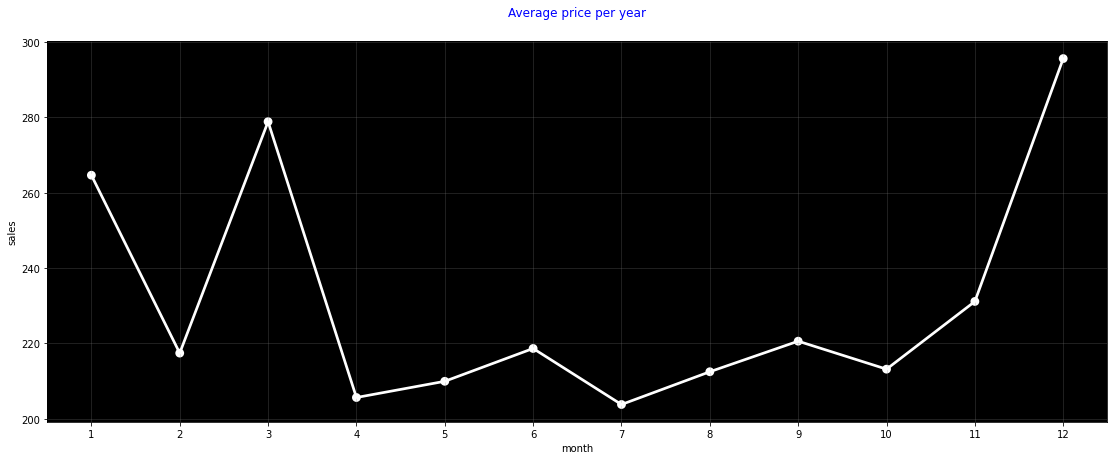

In [ ]:
sales = df.groupby('month')['sales'].mean().reset_index()
# Setting the figure size of the plot to 19 by 7
plt.figure(figsize=(19,7))
# Plotting a pointplot to show the trend of average price across the years
ax = sns.pointplot(sales.month,sales.sales,color="w") 
# setting the background color to black, for contrast
ax.set_facecolor("k") 
plt.grid(True,color="grey",alpha=.3)
plt.title("Average sales per month",color='b', y = 1.05) 
plt.show()